In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [12]:
#correlation
file_path = "C:/Users/sanks/Sahyadri/Internships/Internship-II/DATASETS/FAKEBILL_Day1.csv"  
df = pd.read_csv(file_path)

correlation_matrix = df.corr()

print(correlation_matrix)

print(df.columns)


              is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.775015   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.110244   
height_left    -0.379833  0.019472     1.000000      0.242279    0.299028   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.384513   
margin_low     -0.775015 -0.110244     0.299028      0.384513    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.425608   
length          0.849285  0.097587    -0.320863     -0.401751   -0.658844   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.425608 -0.658844  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000  
Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up

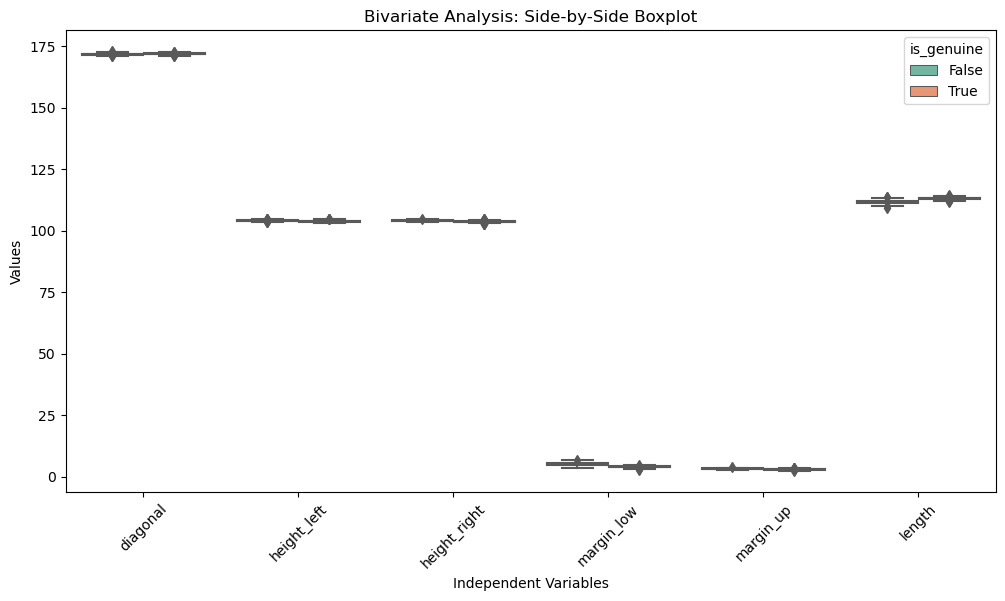

In [13]:
#boxplot in one picture
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

melted_df = pd.melt(df, id_vars=['is_genuine'], value_vars=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

plt.figure(figsize=(12, 6)) 
sns.boxplot(x='variable', y='value', data=melted_df, hue='is_genuine', palette="Set2", color='lightblue')

plt.xlabel("Independent Variables")
plt.ylabel("Values")
plt.title("Bivariate Analysis: Side-by-Side Boxplot")

plt.xticks(rotation=45)  
plt.show()


In [14]:
#t-test
import scipy.stats as stats
import pandas as pd

t_test_results = pd.DataFrame(columns=['Independent Variable', 'T-statistic', 'P-value'])

dependent_variable = 'is_genuine'

independent_variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for independent_var in independent_variables:
    true_values = df[df[dependent_variable] == True][independent_var]
    false_values = df[df[dependent_variable] == False][independent_var]

    t_stat, p_value = stats.ttest_ind(true_values, false_values)

    
    t_test_results = pd.concat([t_test_results, pd.DataFrame({'Independent Variable': [independent_var], 'T-statistic': [t_stat], 'P-value': [p_value]})], ignore_index=True)

print(t_test_results)


  Independent Variable  T-statistic        P-value
0             diagonal     5.184088   2.466867e-07
1          height_left   -15.892086   1.126916e-52
2         height_right   -21.470310   2.270856e-89
3           margin_low   -47.466641  6.913425e-301
4            margin_up   -29.505616  3.144530e-151
5               length    62.262783   0.000000e+00


In [15]:
#Crosstabs
import pandas as pd

for numerical_var in ['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']:
    crosstab = pd.crosstab(df['is_genuine'], df[numerical_var])
    print(crosstab)


diagonal    171.04  171.05  171.13  171.14  171.15  171.16  171.19  171.21  \
is_genuine                                                                   
False            1       1       1       1       1       1       1       2   
True             1       0       1       0       0       0       1       0   

diagonal    171.24  171.25  ...  172.67  172.69  172.72  172.73  172.74  \
is_genuine                  ...                                           
False            0       0  ...       0       0       1       0       0   
True             1       1  ...       1       2       0       1       1   

diagonal    172.75  172.76  172.89  172.92  173.01  
is_genuine                                          
False            0       0       1       0       1  
True             1       1       1       1       0  

[2 rows x 159 columns]
height_left  103.14  103.20  103.22  103.23  103.25  103.26  103.27  103.30  \
is_genuine                                                             

In [16]:
# chi square
for numerical_var in ['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']:
    crosstab = pd.crosstab(df[numerical_var], df['is_genuine'])

    chi2, p, dof, expected = stats.chi2_contingency(crosstab)

    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies table:")
    print(expected)
    print("\n")


Chi-square statistic: 163.07348477911913
P-value: 0.3745516360683156
Degrees of freedom: 158
Expected frequencies table:
[[ 0.66666667  1.33333333]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.33333333]
 [ 0.66666667  1.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 1.66666667  3.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.33333333]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.33333333]
 [ 0.33333333  0.66666667]
 [ 1.          2.        ]
 [ 1.          2.        ]
 [ 1.66666667  3.33333333]
 [ 1.          2.        ]
 [ 2.33333333  4.66666667]
 [ 0.33333333  0.66666667]
 [ 1.33333333  2.66666667]
 [ 1.33333333  2.66666667]
 [ 2.          4.        ]
 [ 2.66666667  5.33333333]
 [ 1.          2.        ]
 [ 1.33333333  2.66666667]
 [ 1.          2.        ]
 [ 2.          4.        ]
 [ 1.          

In [17]:
df.to_csv('C:/Users/sanks/Sahyadri/Internships/Internship-II/DATASETS/FAKEBILL_Day2.csv', index=False)